In [130]:
import xarray as xr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from tqdm import tqdm

In [213]:
ds = xr.open_mfdataset("../era5/era5-nordics-temperature-2016-*.nc", chunks={"time": 12})

In [214]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 73, longitude: 111, time: 8784)
Coordinates:
  * longitude  (longitude) float32 4.5 4.75 5.0 5.25 5.5 5.75 6.0 6.25 6.5 ...
  * latitude   (latitude) float32 71.5 71.25 71.0 70.75 70.5 70.25 70.0 ...
  * time       (time) datetime64[ns] 2016-01-01 2016-01-01T01:00:00 ...
Data variables:
    d2m        (time, latitude, longitude) float32 dask.array<shape=(8784, 73, 111), chunksize=(12, 73, 111)>
    t2m        (time, latitude, longitude) float32 dask.array<shape=(8784, 73, 111), chunksize=(12, 73, 111)>
Attributes:
    Conventions:  CF-1.6
    history:      2018-11-19 16:00:16 GMT by grib_to_netcdf-2.7.0: /opt/ecmwf...

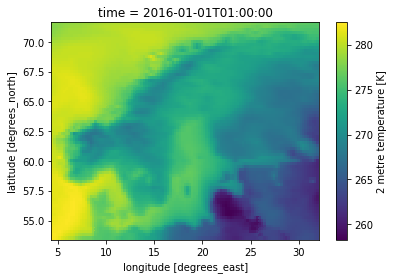

In [215]:
ds["t2m"][1].plot()

In [216]:
ds["temp_c"] = ds["t2m"] - 273.15

In [217]:
quarter_temp_c = ds.temp_c.resample(time="Q").mean("time")

In [218]:
quarter_temp_c

<xarray.DataArray 'temp_c' (time: 4, latitude: 73, longitude: 111)>
dask.array<shape=(4, 73, 111), dtype=float32, chunksize=(1, 73, 111)>
Coordinates:
  * time       (time) datetime64[ns] 2016-03-31 2016-06-30 2016-09-30 2016-12-31
  * longitude  (longitude) float32 4.5 4.75 5.0 5.25 5.5 5.75 6.0 6.25 6.5 ...
  * latitude   (latitude) float32 71.5 71.25 71.0 70.75 70.5 70.25 70.0 ...

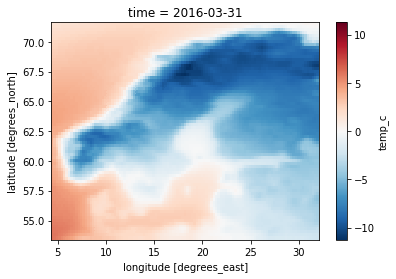

In [219]:
quarter_temp_c[0].plot()

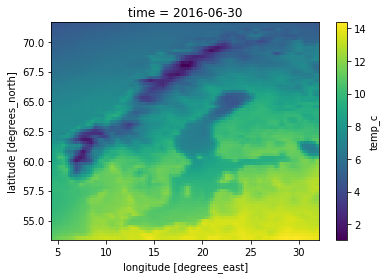

In [220]:
quarter_temp_c[1].plot()

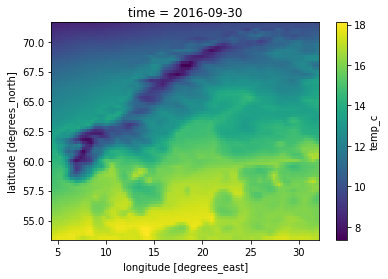

In [221]:
quarter_temp_c[2].plot()

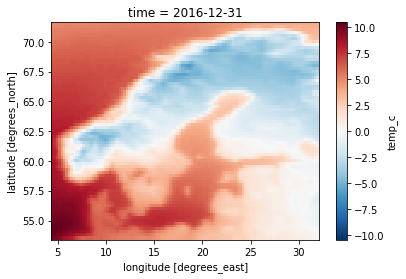

In [222]:
quarter_temp_c[3].plot()

In [223]:
psr = xr.open_dataset("pine_spruce_ratio.nc")

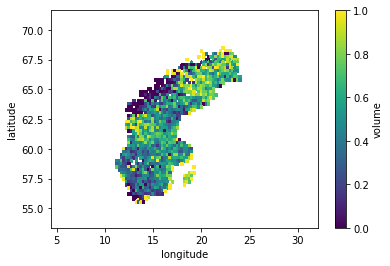

In [224]:
psr.volume.plot()

In [225]:
df = pd.DataFrame()

In [ ]:
data = {
    "ratio": psr.to_array().values.ravel(),
    "q1t": quarter_temp_c[0].values.ravel(),
    "q2t": quarter_temp_c[1].values.ravel(),
    "q3t": quarter_temp_c[2].values.ravel(),
    "q4t": quarter_temp_c[3].values.ravel(),
}

In [ ]:
data.keys()

In [227]:
df = pd.DataFrame(data)

In [228]:
df.dropna(inplace=True)

In [229]:
#df = df[df["ratio"] > 0]

In [230]:
df.columns[1:]

Index(['q1t', 'q2t', 'q3t', 'q4t'], dtype='object')

In [231]:
rf = RandomForestRegressor(n_estimators=500, max_depth=10)

In [232]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[1:]], df["ratio"])

In [233]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [234]:
y_pred = rf.predict(X_test)

In [235]:
mean_squared_error(y_test, y_pred)

0.05716008271937061

In [236]:
r2_score(y_test, y_pred)

0.22491568288490915

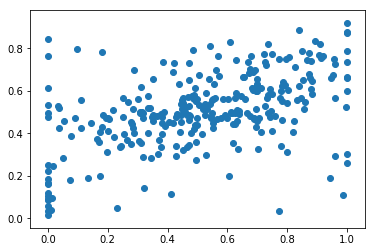

In [237]:
plt.scatter(y_test, y_pred)

In [238]:
df_results = pd.DataFrame({"observed": y_test, "predicted": y_pred},)

In [239]:
df_results

,observed,predicted
2721,0.173327,0.405606
5490,0.613703,0.494442
6026,0.303670,0.365389
3706,0.690607,0.470687
5817,0.000000,0.493872
3058,0.722122,0.772323
2715,0.051118,0.282220
6146,0.265929,0.365738
4485,0.603398,0.561518
5250,0.111738,0.423245


In [182]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)

In [183]:
feature_importances

,importance
q3t,0.274025
q4t,0.263562
q2t,0.259069
q1t,0.203344


<BarContainer object of 4 artists>

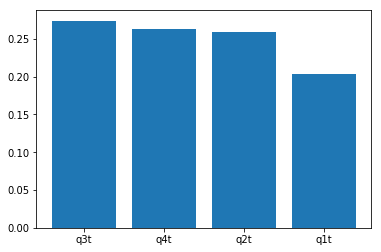

In [184]:
plt.bar(feature_importances.index, feature_importances["importance"])